# 1.1 Setup and load the data


In [1]:
import tensorflow as tf
import os


In [2]:
# gpus = tf.config.experimental.list_physical_devices('GPU')
# print(gpus)

In [3]:
#Avoid OOM erros by setting GPU Memory Consumption Growth
# Limita o uso de memória para apenas o que o TF precisa

# gpus = tf.config.experimental.list_physical_devices('GPU')
# for gpu in gpus:
#     tf.config.experimental.set_memory_growth(gpu, True)

In [4]:
# os.path.join('data', 'happy')

Loading drive

In [5]:
from google.colab import drive

path_code = '/content/drive/MyDrive/Perceptus/classificacao/'
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1.2 Remove dodgy images

In [6]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [7]:
data_dir = path_code + 'data'

In [8]:
# os.listdir(data_dir)
# os.listdir(os.path.join(data_dir, 'cats'))

In [9]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

### How to visualize images with openCV

In [10]:
# List every image in the data folder
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        print(image)

images41.jpg
images60.jpg
23MarchKit-HPpromo.jpg
images105.jpg
images64.jpg
images75.jpg
images7.jpg
image19.jpeg
images20.jpg
images30.jpg
images66.jpg
images101.jpg
images57.jpg
images81.jpg
golden-retriever-puppy.jpg
image18.jpeg
images46.jpg
images37.jpg
adolescent-dog-with-stick.jpg
images23.jpg
https3A2F2Fcdn.cnn.com2Fcnnnext2Fdam2Fassets2F220818142713-dogs-tears-emotions-wellness-stock.jpg
PH-Beagle.png
220128-chihuahua-mb-0853-a252ab.jpg
GettyImages-912084898-e1641834261695.jpg
TELEMMGLPICT000321244283_trans_NvBQzQNjv4BqRo0U4xU-30oDveS4pXV-Vv4Xpit_DMGvdp2n7FDd82k.jpeg
Dog_1098119012_Teaser.jpg
pitbull-illustration.jpg
RF2003H_61b169765d01e.jpg
IMG_3091-1000x873.jpg
NYPICHPDPICT000009478874.jpg
580540_mjznrj.jpg
images137.jpg
og-image.jpg
shortest-dog-living-3_slide-3a23991ea5dcc15dec9bc8b98f863da407029a77-s1100-c50.jpeg
1.jpg
28DOGS-BEHAVIOR1-mediumSquareAt3X-v2.jpg
pexels-photo-3687770.jpeg
Commander_28Biden_dog29_in_February_2022.jpg
dog_16x9_3.jpg
maltese-portrait.jpg
prairi

In [11]:
img = cv2.imread(os.path.join(data_dir, 'cats', 'large-cat-breed-1553197454.jpg'))

In [12]:
img.shape

(1200, 1200, 3)

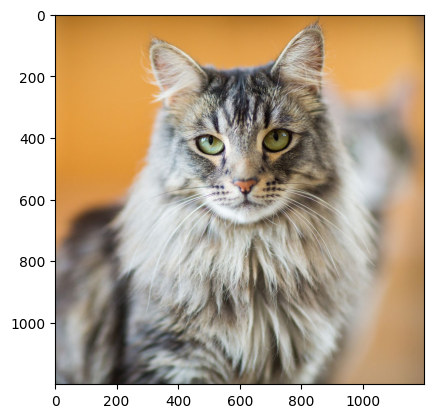

In [13]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

## 1.2 Remove dodgy images

In [14]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 1.3 Load Data

In [15]:
import numpy as np

In [16]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 185 files belonging to 2 classes.


In [17]:
data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [18]:
data_iterator = data.as_numpy_iterator()

In [19]:
data_iterator

In [20]:
batch = data_iterator.next()

In [21]:
# batch
# len(batch)

In [22]:
# Images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [23]:
# Labels
# Class 1 = Dogs
# Class 0 = Cats
batch[1]

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1], dtype=int32)

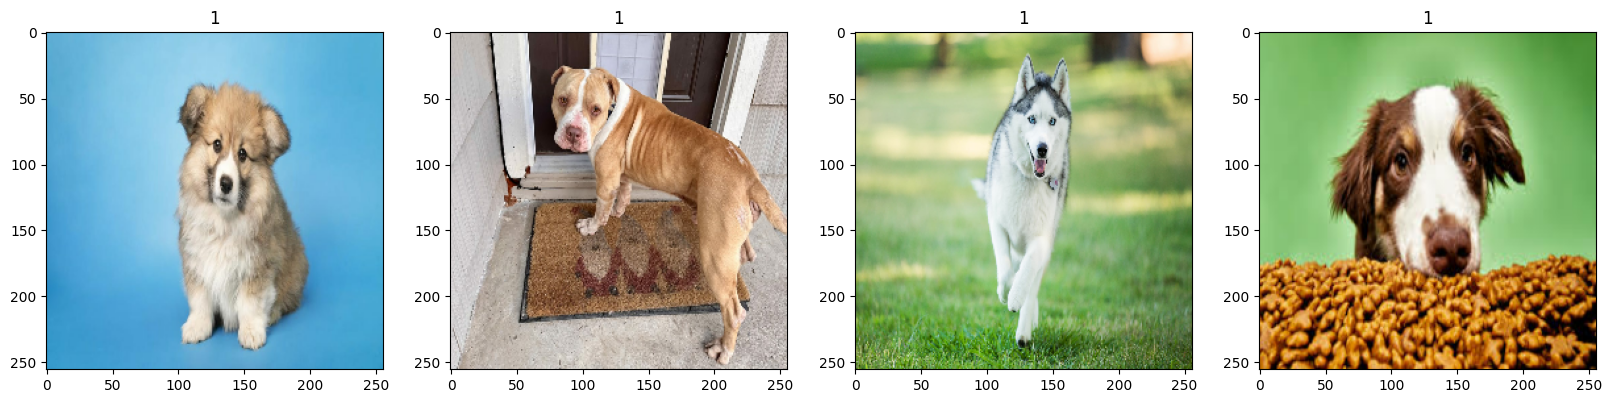

In [24]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 2. Preprocess Data

## 2.1 Scale data 

In [25]:
data = data.map(lambda x,y: (x/255, y))

In [26]:
scaled_iterator = data.as_numpy_iterator()

In [27]:
batch = scaled_iterator.next()

In [28]:
batch[0].max()
# batch[0].min()

1.0

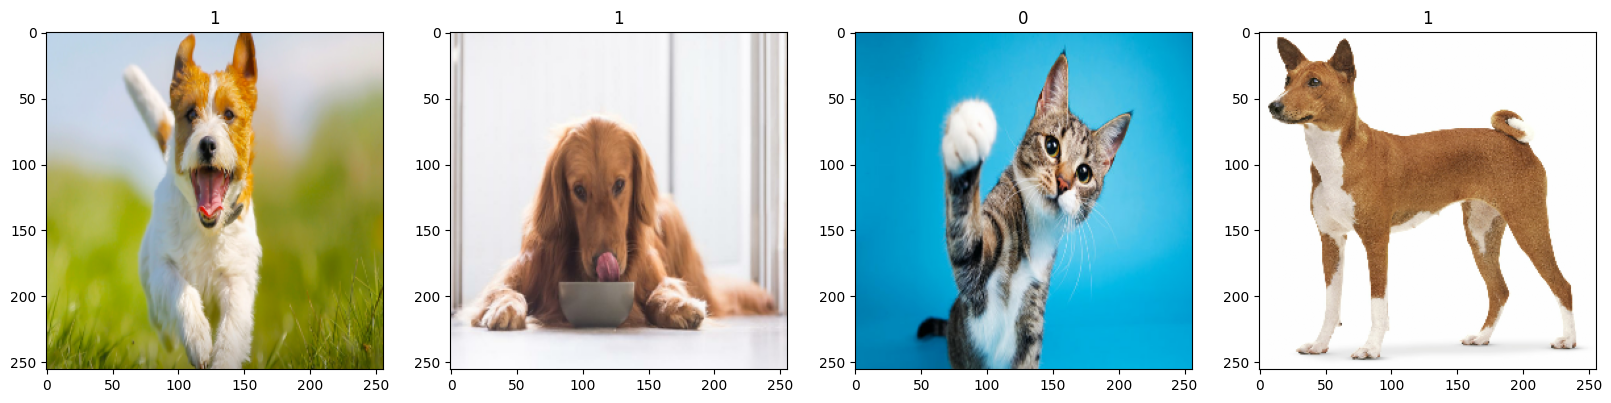

In [29]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [30]:
# scaled_iterator.next()
# scaled_iterator.next()[0].max()

## 2.2 Split Data

In [31]:
len(data)

6

In [32]:
train_size = int(len(data) * 0.7)
val_size = int(len(data) * 0.2)
test_size = int(len(data) * 0.1) + 1
print(f"train_size: {train_size}")
print(f"val_size: {val_size}")
print(f"test_size: {test_size}")

train_size: 4
val_size: 1
test_size: 1


In [33]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [34]:
print(f"train: {len(train)}")
print(f"val: {len(val)}")
print(f"test: {len(test)}")

train: 4
val: 1
test: 1


# 3. Deep Learning

## 3.1 Build Deep Learning Model

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [36]:
model = Sequential()

In [37]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1 , activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [38]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

## 3.2 Train

In [40]:
# logdir = path_code + 'logs/'
logdir = os.path.join(path_code, 'logs')

In [41]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [42]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
4/4 [==============================] - 23s 2s/step - loss: 1.4973 - accuracy: 0.4766 - val_loss: 0.6804 - val_accuracy: 0.5625
Epoch 2/20
4/4 [==============================] - 10s 2s/step - loss: 0.7167 - accuracy: 0.4688 - val_loss: 0.6856 - val_accuracy: 0.5312
Epoch 3/20
4/4 [==============================] - 10s 2s/step - loss: 0.6913 - accuracy: 0.4766 - val_loss: 0.6898 - val_accuracy: 0.5000
Epoch 4/20
4/4 [==============================] - 10s 1s/step - loss: 0.6862 - accuracy: 0.6094 - val_loss: 0.6837 - val_accuracy: 0.7188
Epoch 5/20
4/4 [==============================] - 10s 2s/step - loss: 0.6790 - accuracy: 0.6797 - val_loss: 0.6877 - val_accuracy: 0.3750
Epoch 6/20
4/4 [==============================] - 15s 3s/step - loss: 0.6739 - accuracy: 0.5938 - val_loss: 0.6678 - val_accuracy: 0.7188
Epoch 7/20
4/4 [==============================] - 10s 2s/step - loss: 0.6551 - accuracy: 0.7031 - val_loss: 0.6399 - val_accuracy: 0.6875
Epoch 8/20
4/4 [==================

In [ ]:
hist.history

## 3.3 Plot Performance

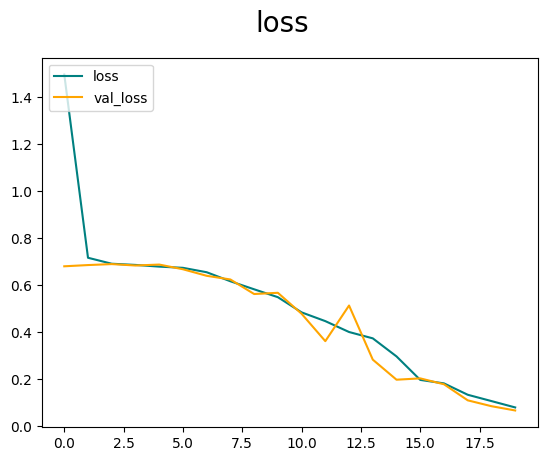

In [46]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

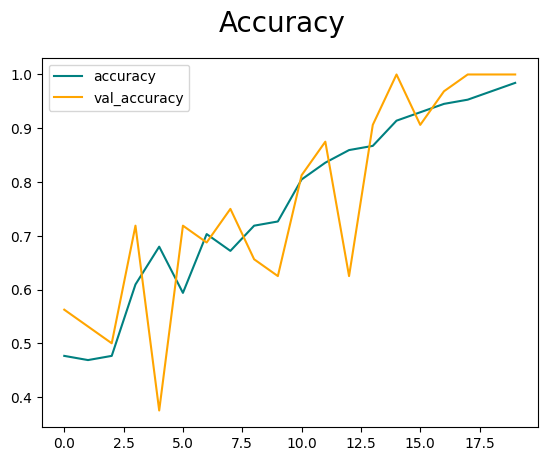

In [47]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 4. Evaluate Performance

# 4.1 Evaluate

In [49]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [50]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [52]:
len(test)

1

In [53]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 405ms/step


In [56]:
print(f'Precision: {pre.result()}, Recall: {re.result()}, Accuracy: {acc.result()}')

Precision: 0.9166666865348816, Recall: 1.0, Accuracy: 0.9599999785423279


## 4.2 Test

In [57]:
# import cv2

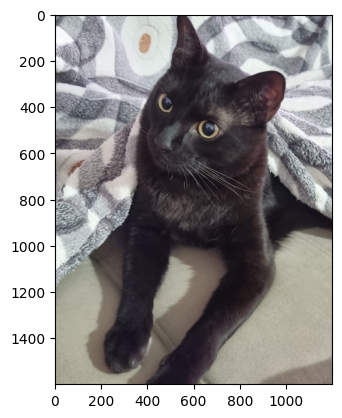

In [121]:
img = cv2.imread('frank3.jpg')
# plt.imshow(img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

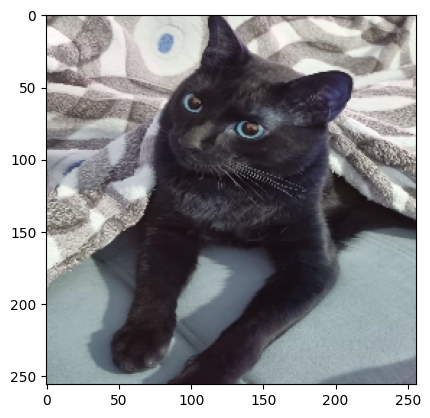

In [122]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [123]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 62ms/step


In [124]:
yhat

array([[0.73193604]], dtype=float32)

In [125]:
if yhat > 0.5:
    print(f"Predicted class is Dog")
else:
    print(f"predicted class is Cat")

Predicted class is Dog


# 5. Save the Model

## 5.1 Save the Model

In [94]:
from tensorflow.keras.models import load_model

In [95]:
# model.save(os.path.join(path_code + 'models', 'catdogmodel.h5'))

In [96]:
# new_model = load_model(os.path.join(path_code + 'models', 'catdogmodel.h5'))

In [97]:
# new_model

In [111]:
yhatnew = new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 24ms/step


In [112]:
if yhatnew > 0.5:
    print(f"Predicted class is Dog")
else:
    print(f"predicted class is Cat")

Predicted class is Dog
